IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
1       1.0 -0.141375   0.034725   -0.867272   0.233694         99.0   
2      89.0 -0.052926   0.016320   -0.525461   0.138144        113.0   
3      58.0 -0.031407   0.007731   -0.714004   0.093264        111.0   
4       2.0 -0.044136   0.010260    0.351586   0.110359          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   10.0 -0.140203   0.034049   -0.827969   0.231542        103.0   
1345   25.0 -0.026179   0.019685   -0.108298   0.142540         81.0   
1346    6.0 -0.033887   0.016994   -0.421044   0.134518        102.0   
1347   10.0 -0.027445   0.018541    4.226955   0.138719         86.0   
1348   51.0  0.008648   0.050864    2.559644   0.225415         74.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            79.0    3.785400    3.155365 -0.013642  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
1    -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
2    -0.052926   0.016320   -0.525461   0.138144        113.0        104.0   
3    -0.031407   0.007731   -0.714004   0.093264        111.0        108.0   
4    -0.044136   0.010260    0.351586   0.110359          0.0         72.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.140203   0.034049   -0.827969   0.231542        103.0          0.0   
1345 -0.026179   0.019685   -0.108298   0.142540         81.0        107.0   
1346 -0.033887   0.016994   -0.421044   0.134518        102.0         80.0   
1347 -0.027445   0.018541    4.226955   0.138719         86.0          0.0   
1348  0.008648   0.050864    2.559644   0.225415         74.0         96.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.131425   0.041713   -1.545744   0.242636         65.0         84.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    5.450591    3.771166  0.026034   0.009272  ...      10237.019859   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         4.099919          0.789438          -0.317474          4.194834   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               111.0               108.0          38.156857   

     amp2(Curr(ESC_5))  Guasto  
340          18.738182       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
1    -0.141375   0.034725   -0.867272   0.233694         99.0         93.0   
2    -0.052926   0.016320   -0.525461   0.138144        113.0        104.0   
3    -0.031407   0.007731   -0.714004   0.093264        111.0        108.0   
4    -0.044136   0.010260    0.351586   0.110359          0.0         72.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.140203   0.034049   -0.827969   0.231542        103.0          0.0   
1345 -0.026179   0.019685   -0.108298   0.142540         81.0        107.0   
1346 -0.033887   0.016994   -0.421044   0.134518        102.0         80.0   
1347 -0.027445   0.018541    4.226955   0.138719         86.0          0.0   
1348  0.008648   0.050864    2.559644   0.225415         74.0         96.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032590   0.017026   -0.400594   0.134314    98.000000    79.000000   
1    -0.141375   0.034725   -0.867272   0.233694    99.000000    93.000000   
2    -0.052926   0.016320   -0.525461   0.138144   113.000000   104.000000   
3    -0.031407   0.007731   -0.714004   0.093264   111.000000   108.000000   
4    -0.044136   0.010260    0.351586   0.110359     0.000000    72.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.022383   0.006889   -0.486517   0.085860   101.594473    77.702764   
1619 -0.002156   0.011449    2.785973   0.106879    56.241058    72.482116   
1620 -0.120817   0.040517   -1.536067   0.234521    61.478501    75.217751   
1621  0.003453   0.007402   -0.403356   0.085994     0.000000    96.004087   
1622 -0.122681   0.040798   -1.536961   0.236081    58.591615    71.183231   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=45)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=45, score_func=<function f_regression at 0x000002810D5E1120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False  True
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.277283
28         freq1(AccX)  3.540181
12         freq1(GyrY)  3.122322
11           RMS(GyrY)  2.813147
93   freq2(RPM(ESC_1))  2.704119
92   freq1(RPM(ESC_1))  2.689787
9            var(GyrY)  2.671204
153   kurt(RPM(ESC_5))  2.541605
14          amp1(GyrY)  2.406969
159   var(Curr(ESC_5))  2.185972
104     <>(RPM(ESC_2))  1.980838
8             <>(GyrY)  1.790809
152    var(RPM(ESC_5))  1.786550
78    amp1(RPM(ESC_0))  1.735197
107    RMS(RPM(ESC_2))  1.674662
32            <>(AccY)  1.573881
22          amp1(GyrZ)  1.561530
62         amp1(Pitch)  1.263559
30          amp1(AccX)  1.066947
80     <>(Curr(ESC_0))  1.050088
76   freq1(RPM(ESC_0))  1.046007
17           var(GyrZ)  1.041982
4          freq1(GyrX)  0.994861
19           RMS(GyrZ)  0.947441
77   freq2(RPM(ESC_0))  0.928235
57          var(Pitch)  0.901507
156   amp1(RPM(ESC_5))  0.778509
97    var(Curr(ESC_1))  0.658712
81    var(Curr(ESC_0))  0.648391
83    RMS(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.032590   0.017026    98.000000 -0.013642   0.028006   0.167669   
1    -0.141375   0.034725    99.000000  0.014483   0.004008   0.064859   
2    -0.052926   0.016320   113.000000  0.009941   0.025205   0.158890   
3    -0.031407   0.007731   111.000000  0.050960   0.012422   0.122427   
4    -0.044136   0.010260     0.000000  0.044639   0.004748   0.082018   
...        ...        ...          ...       ...        ...        ...   
1618 -0.022383   0.006889   101.594473  0.044759   0.012555   0.120524   
1619 -0.002156   0.011449    56.241058  0.065762   0.011345   0.125056   
1620 -0.120817   0.040517    61.478501  0.020152   0.008693   0.095262   
1621  0.003453   0.007402     0.000000  0.015165   0.005695   0.076877   
1622 -0.122681   0.040798    58.591615  0.021241   0.008830   0.096209   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  var(Curr(ESC_2))  \
0        0.000000   30.704383   

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.131425   0.041713         65.0  0.026034   0.009272   0.099624   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  var(Curr(ESC_2))  \
340          0.0    9.895821    8.746149   0.005574  ...          0.568326   

     freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340               48.0               50.0         -1.458986   

     kurt(Curr(ESC_4))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340          -1.111738    947441.415754         -0.923557      18881.700454   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  
340         4.099919          0.789438  

[1 rows x 45 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.032590   0.017026    98.000000 -0.013642   0.014126   -1.420411   
1    -0.141375   0.034725    99.000000  0.014483   0.008880   -1.409273   
2    -0.052926   0.016320   113.000000  0.009941   0.026182   -0.420033   
3    -0.031407   0.007731   111.000000  0.050960   0.008050   -1.364092   
4    -0.044136   0.010260     0.000000  0.044639   0.006485   -1.506592   
...        ...        ...          ...       ...        ...         ...   
1618 -0.022383   0.006889   101.594473  0.044759   0.008269   -1.378168   
1619 -0.002156   0.011449    56.241058  0.065762   0.004450   -1.438490   
1620 -0.120817   0.040517    61.478501  0.020152   0.005702   -0.821873   
1621  0.003453   0.007402     0.000000  0.015165   0.005774   -0.906000   
1622 -0.122681   0.040798    58.591615  0.021241   0.005673   -0.823755   

      RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  kurt(RPM(ESC_1))  var(Curr(ESC_1))  \
0      0.197485    1

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.131425   0.041713         65.0  0.026034   0.005574   -0.889274   

     RMS(GyrZ)  amp1(GyrZ)  amp2(AccZ)  kurt(RPM(ESC_1))  var(Curr(ESC_1))  \
340   0.155596    0.384919   20.074233         -0.718656           0.34256   

     amp2(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  kurt(RPM(ESC_4))  \
340           9.567937     5404.168022          0.568326         -1.458986   

     kurt(Curr(ESC_4))  
340          -1.111738  


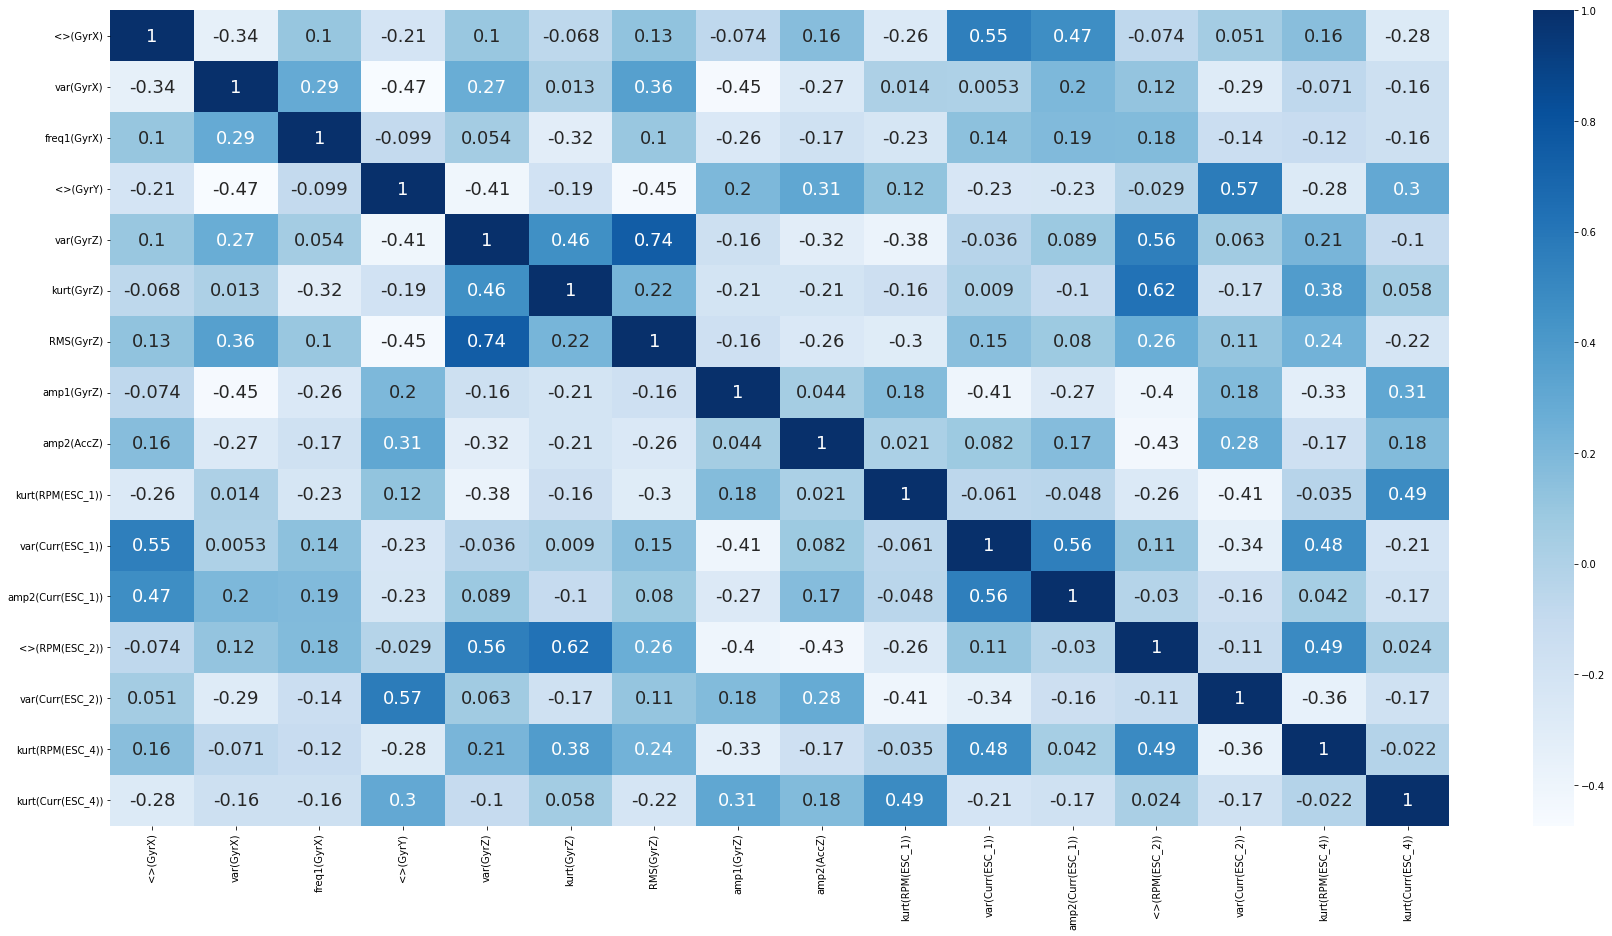

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 16)
(325, 16)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.69230769 0.68461538 0.67307692 0.67953668 0.67953668]
Accuracy: 0.7 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64


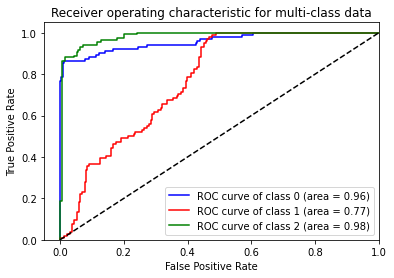

----------------------------------------------------
Cross-Validation: [0.65769231 0.65769231 0.6        0.66409266 0.64478764]
Accuracy: 0.63 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64


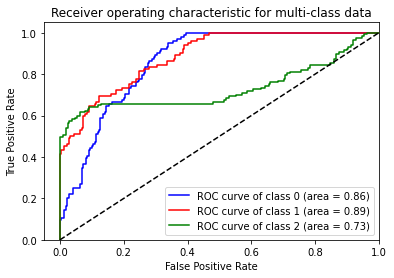

----------------------------------------------------
Cross-Validation: [0.51923077 0.64615385 0.59230769 0.61389961 0.55598456]
Accuracy: 0.76 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


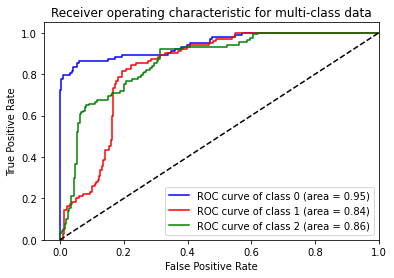

----------------------------------------------------
Cross-Validation: [0.52307692 0.56153846 0.48461538 0.57142857 0.55984556]
Accuracy: 0.32 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


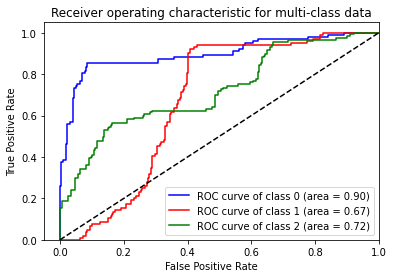

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

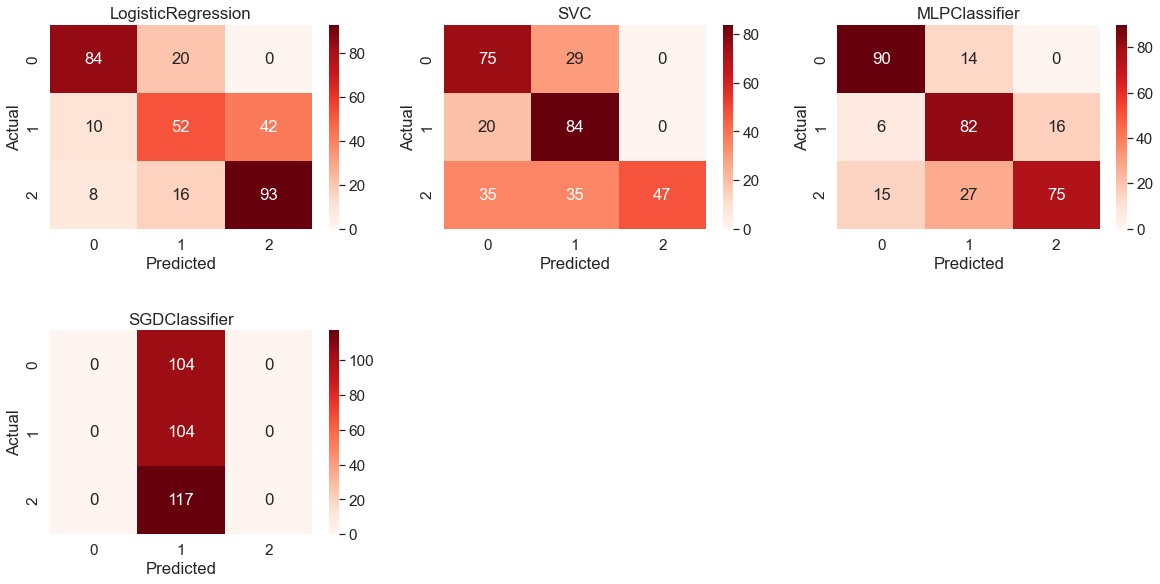

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation score

Text(0.5, 1.0, 'Cross validation scores')

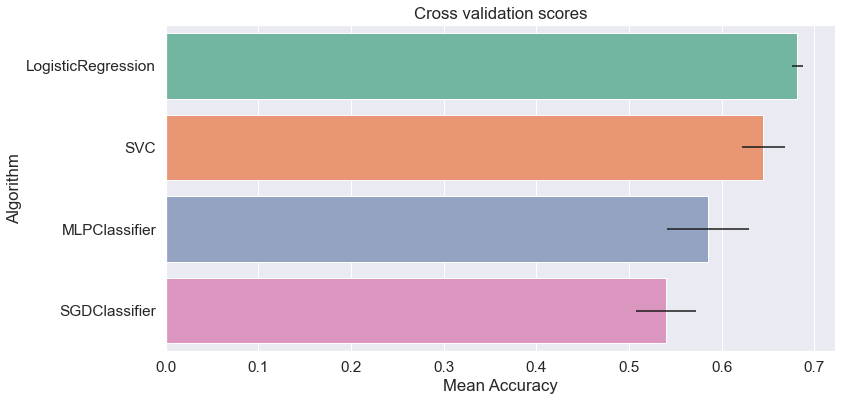

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       104
           1       0.59      0.50      0.54       104
           2       0.69      0.79      0.74       117

    accuracy                           0.70       325
   macro avg       0.70      0.70      0.70       325
weighted avg       0.70      0.70      0.70       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       104
           1       0.57      0.81      0.67       104
           2       1.00      0.40      0.57       117

    accuracy                           0.63       325
   macro avg       0.71      0.64      0.63       325
weighted avg       0.73      0.63      0.62       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       104
           1       0.67